In [1]:
import sys
import fitsio

import pylab             as pl
import numpy             as np

import matplotlib        as mpl
import matplotlib.pylab  as plt
import astropy.io.fits   as fits

from   matplotlib.pyplot import figure
from   astropy.table     import Table, vstack

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [19]:
from   GAMA.in_gama      import in_gama
from   GAMA.gama_params  import gama_params

In [15]:
version=0.0

In [4]:
# hdr  = fits.open('/project/projectdirs/desi/target/catalogs/dr9/0.49.0/randoms/resolve/randoms-1-3.fits')[1].header 
# hdr

### https://arxiv.org/pdf/1506.08222.pdf

In [5]:
rands = Table.read('/project/projectdirs/desi/target/catalogs/dr9/0.49.0/randoms/resolve/randoms-allsky-1-0.fits')

In [6]:
rands

RA,DEC,BRICKNAME,BRICKID,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,APFLUX_G,APFLUX_R,APFLUX_Z,APFLUX_IVAR_G,APFLUX_IVAR_R,APFLUX_IVAR_Z,MASKBITS,WISEMASK_W1,WISEMASK_W2,EBV,PHOTSYS,HPXPIXEL
float64,float64,bytes8,int32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,uint8,uint8,float32,bytes1,int64
159.4131357028148,1.6958429951029705,1593p017,341085,4,5,4,2202.4685,1351.6144,176.08948,1397.4951,804.439,92.091736,2.9332201,0.8627408,1.4796568,1.3563635,1.1815115,-0.0029656077,0.00012924832,-0.01903273,90631.66,46314.15,4624.998,0,0,0,0.03198273,S,27396
229.68008652445826,2.632120703682229,2296p027,347126,4,3,3,1528.4756,433.46014,108.978035,957.7211,274.42572,59.785614,3.2730818,0.9197987,1.461309,1.4885942,1.283157,0.001841283,0.009070957,0.019961722,61315.605,17929.328,3350.4792,0,0,0,0.044614986,S,31417
55.217288737989506,-52.9064609236666,0552m530,66723,10,10,10,6651.2056,4314.9785,542.30786,3925.8394,2316.9905,256.37674,6.553882,2.3166726,1.3506622,1.2362771,1.0537071,-0.0019213576,-0.0013958698,0.011342581,233571.86,125673.15,11228.23,0,0,0,0.014716463,S,33630
356.1033289818801,-4.521820797130017,3561m045,305882,4,3,4,2386.6948,596.382,97.857605,1471.0306,368.56274,62.838047,2.4178596,0.7537489,1.4931192,1.427494,1.5831257,0.0006046899,0.0110032,0.0052752225,99125.83,22122.482,4548.6045,0,0,0,0.03042314,S,17385
0.8599232385635144,38.7748730840267,0007p387,537402,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.09619541,,0
212.53170278142431,-45.487130239843815,2125m455,95397,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.101079725,,0
171.01483160386027,-23.298203117411433,1709m232,200633,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.051792923,,0
164.26069646894933,-52.56959076378713,1642m525,68737,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.48661456,,0
336.5307660608876,43.86882762273794,3363p437,560125,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.19036128,,0


In [7]:
len(rands) / 2500.

41257.134

In [8]:
all_sky_deg2 = 4. * np.pi * (180. / np.pi)**2.
all_sky_deg2

41252.96124941928

In [9]:
fsky = len(rands) / 2500. / all_sky_deg2
fsky

1.0001011503284696

In [10]:
rands = rands[in_gama(rands['RA'].data, rands['DEC'].data)]

In [11]:
fsky = len(rands) / 2500. / all_sky_deg2
fsky

0.005705830390619861

In [12]:
cmap = plt.cm.plasma

cmaplist = [cmap(i) for i in range(cmap.N)]

cmaplist[0] = (.5, .5, .5, 1.0)

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 20, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

Text(0.5, 1.0, '$f_{\\rm{sky}}=$0.005706')

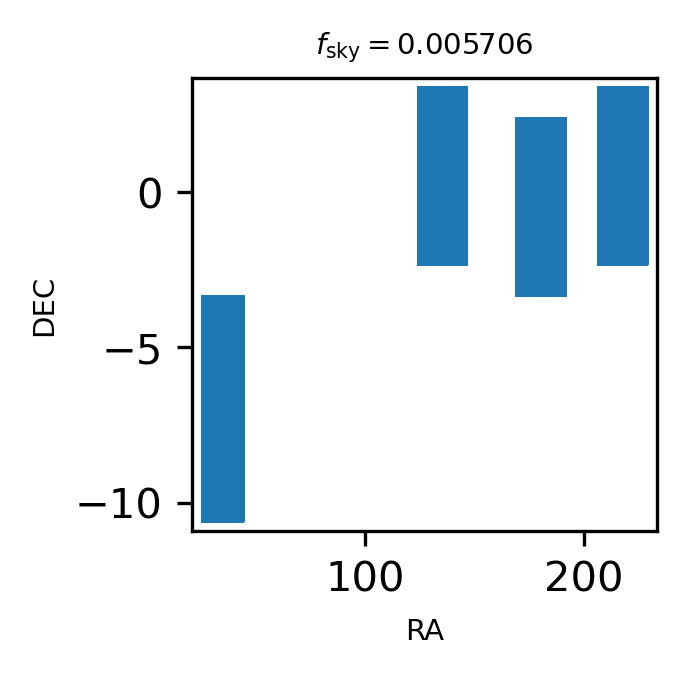

In [18]:
figure(figsize=(2, 2), dpi=300)

pl.scatter(rands['RA'], rands['DEC'], marker=',', lw=0.0, vmin=0, vmax=19, cmap=cmap, norm=norm)

pl.xlabel('RA', fontsize=7)
pl.ylabel('DEC', fontsize=7)

pl.title(r'$f_{\rm{sky}}=$' + '{:.6f}'.format(fsky), fontsize=7)

In [16]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/GAMA/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

CATAID,GAMA_NAME,IC_FLAG,N_SPEC,N_GAMA_SPEC,DIST,SPECID,SURVEY,SURVEY_CODE,RA,DEC,WMIN,WMAX,NQ,PROB,FILENAME,URL,URL_IMG,ZGAMA,RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA_IVAR,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,WISE_COADD_ID,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,FITBITS,SERSIC,SERSIC_IVAR,GMAG,GMAG_DRED,RMAG,RMAG_DRED,FIBER_RMAG,FIBER_RMAG_DRED,GMR,GMR_DRED,BGS_A_SUCCESS,BGS_A_WEIGHT,BGS_Z_SUCCESS,BGS_Z_WEIGHT
int32,bytes23,int16,int16,int16,float32,bytes33,bytes9,int16,float64,float64,float32,float64,int16,float32,bytes67,bytes88,bytes92,float32,int16,int32,bytes8,int32,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,uint8,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,float64,bool,float64
6802,GAMAJ113601.43+004315.3,4104,1,1,0.07,G12_Y3_017_187,GAMA,5,174.006,0.72093,3727.71,8857.67,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_187.png,0.05054,9010,335384,1741p007,166,SER,6097167000000.0,3554916000000.0,381401.0 .. 493445.7,0.022343121,21.990646,36.444214,50.733025,37.640892,27.248919,21.993412,925.2927,304.3041,207.21066,27.616196,2.2400048,0.538826,0.0007735326,1.0688897e-05,0.93599963,0.95642483,0.97538704,0.99622065,0.9976773,0.99950415,0.9998127,5,6,4,176,164,14,14,1.3557901,1.2377856,1.2912774,1.0331075,0.3406912,0.4654759,0.16448326,0.00094854936,0.0046535768,0.0043984763,0.028020555,0.12548734,1.6617776,1.37349,0.013087122,0.019209547,0.002527629,0.9996716,0.9996256,0.9993272,0,0,0,0,0,0,0,0,1.5661247,1.6137096,1.2967077,1548.8694,829.2074,100.58068,1023.8579,550.0185,55.851147,3.8401518,0.67107224,1739p000,1.1175152,162410.84,0.2640286,187589.53,0.3291246,199361.88,7.9292564,13.140839,18.293013,7.9302425,13.149607,18.309229,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.90348786,5671.4395,19.144405,19.072594,18.5

Text(0.5, 1.0, '$f_{\\rm{sky}}=$0.006')

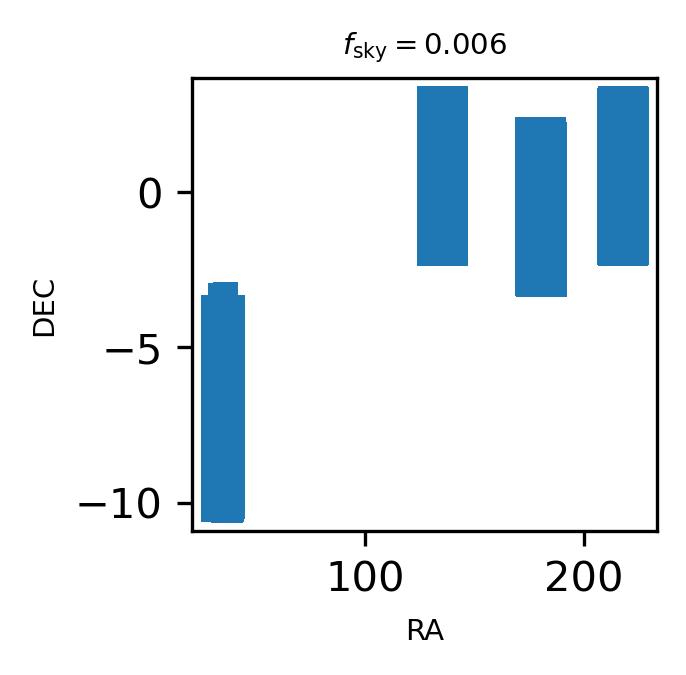

In [20]:
figure(figsize=(2, 2), dpi=300)

pl.scatter(bright_merge_obs['RA'], bright_merge_obs['DEC'], marker=',', lw=0.0, vmin=0, vmax=19, cmap=cmap, norm=norm)

pl.xlabel('RA', fontsize=7)
pl.ylabel('DEC', fontsize=7)

pl.title(r'$f_{\rm{sky}}=$' + '{:.3f}'.format(fsky), fontsize=7)

# Done.